#### # Importando Módulos

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

### Parte I: Definindo as Fórmulas para Cálculos 

In [19]:
# fórmula para estimar custo de estoque em trânsito

# ET = i (C . Q ) dias/365

# ET = estoque em trânsito;
# i = custo de manutenção de estoques como percentual do valor médio disponível no ano;
# C = custo de um item;
# Q = quantidade de itens movimentados anualmente;
# dias = quantidade de dias em que a carga permanece em trânsito.

In [20]:
# fórmula para estimar custo de frete

# Frete = Clb (Q * P)

# Clb = custo por libra(peso);
# Q = quantidade de itens movimentados anualmente;
# P = peso de cada item em lb.

In [21]:
# fórmula para calcular valor agregrado pelo transporte (valos dos itens + valor do frete)

# Valor_Agregado = Q * (C + P * Clb)

# Q = quantidade de itens movimentados anualmente;
# C = custo de um item;
# Clb = custo por libra(peso);
# P = peso de cada item em libra.

In [22]:
# fórmula para calcular quantidade de viagens ao ano

# Qv = (Q * P) / Qm

# P = peso de cada item em libra.
# Q = quantidade de itens movimentados anualmente;
# Qm = quantidade mínima de transporte em libras por viagem.

In [23]:
# fórmula para calcular custo de manutenção de estoque 

# Manutencao_Estoque = i * (Valor_Agregado/(Qv * 2))

# i = custo de manutenção de estoques como percentual do valor médio disponível no ano;
# Qv = quantidade de viagens ao ano.

### Parte II: Criando Função para Cálculo de Armazenagem e Frete

In [24]:
def calculo_logistico_anual(i, C, Q, Clb, P, Qm, dias):
    ET = i * (C * Q) * dias/365
    Frete = Clb * (Q * P)
    Valor_Agregado = Q * (C + P * Clb)
    Qv = (Q * P) / Qm
    Manutencao_Estoque = i * (Valor_Agregado/(Qv * 2))
    Armazenagem = ET + Manutencao_Estoque
    
    return np.array([Armazenagem, Frete])

### Parte III: Calculando Valores por Modal

In [25]:
modal_marítmo = calculo_logistico_anual(0.25, 200, 12000, 0.03, 175, 100000, 30)
modal_marítmo

array([63975.78277886, 63000.        ])

In [26]:
modal_ferroviário = calculo_logistico_anual(0.25, 200, 12000, 0.05, 175, 80000, 15)
modal_ferroviário

array([ 36586.10567515, 105000.        ])

In [27]:
modal_rodoviário = calculo_logistico_anual(0.25, 200, 12000, 0.09, 175, 40000, 7)
modal_rodoviário

array([ 17671.13502935, 189000.        ])

In [28]:
modal_aéreo = calculo_logistico_anual(0.25, 200, 12000, 0.15, 175, 10000, 2)
modal_aéreo

array([  4903.74266145, 315000.        ])

### Parte IV: Plotando Custos para encontrar Ponto Ótimo  

#### # Criando e normalizando arrays unificados por custos

In [29]:
custos_frete = np.array([modal_marítmo[1], modal_ferroviário[1], modal_rodoviário[1], modal_aéreo[1]])
custos_frete

array([ 63000., 105000., 189000., 315000.])

In [30]:
custos_armazenagem = np.array([modal_marítmo[0], modal_ferroviário[0], modal_rodoviário[0], modal_aéreo[0]])
custos_armazenagem

array([63975.78277886, 36586.10567515, 17671.13502935,  4903.74266145])

In [46]:
custo_total = (custos_frete + custos_armazenagem)
custo_total

array([126975.78277886, 141586.10567515, 206671.13502935, 319903.74266145])

In [32]:
total_maritmo = modal_marítmo[0] + modal_marítmo[1]
total_ferroviario = modal_ferroviário[0] + modal_ferroviário[1]
total_rodoviario = modal_rodoviário[0] + modal_rodoviário[1]
total_aereo = modal_aéreo[0] + modal_aéreo[1]
custos_totais = [total_maritmo, total_ferroviario, total_rodoviario, total_aereo]

In [33]:
custos_frete_normalizado = (custos_frete - custos_frete.min()) / (custos_frete.max() - custos_frete.min())
custos_armazenagem_normalizado = (custos_armazenagem - custos_armazenagem.min()) / (custos_armazenagem.max() - custos_armazenagem.min())
custo_total_normalizado = (custo_total - custo_total.min()) / (custo_total.max() - custo_total.min())

#### # Plotando gráfico com trade off dos valores de frete vs armazengam para encontrar o ponto ótimo

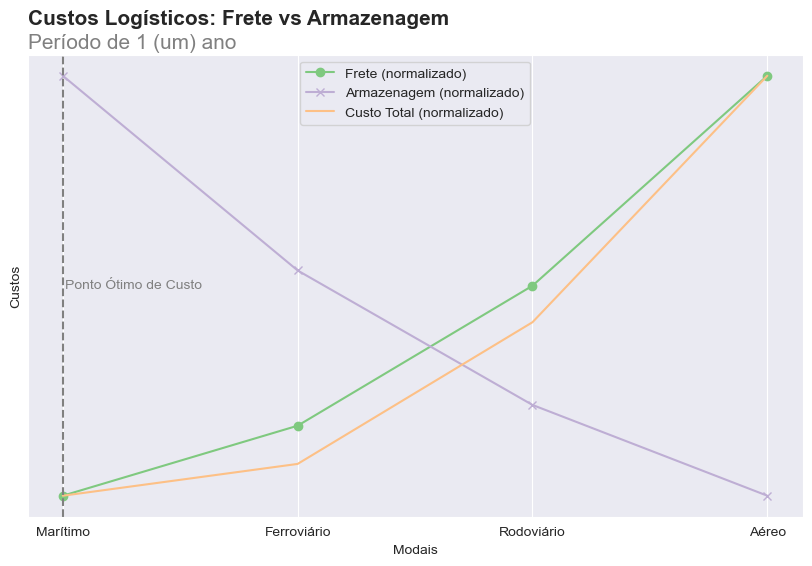

Menor Custo: Marítimo ; Custo Total: 126975.78


In [47]:
indices = np.array([0, 1, 2, 3])
modais = ['Marítimo', 'Ferroviário', 'Rodoviário', 'Aéreo']

# Estilizando o gráfico
sns.set_palette('Accent')
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6)) 

# Plot dos dados normalizados
plt.plot(indices, custos_frete_normalizado, marker='o', label='Frete (normalizado)')
plt.plot(indices, custos_armazenagem_normalizado, marker='x', label='Armazenagem (normalizado)')
plt.plot(indices, custo_total_normalizado, label='Custo Total (normalizado)')

# Cálculo da derivada
differences = custos_frete_normalizado - custos_armazenagem_normalizado
derivative = np.gradient(differences)

# Encontrar o índice do ponto ótimo (onde a derivada é próximo de zero)
optimal_index = np.argmin(np.abs(derivative))

plt.xlabel('Modais')
plt.ylabel('Custos')
plt.title('Custos Logísticos: Frete vs Armazenagem' + '\n', fontsize = 15, loc = 'left', weight='bold')
plt.suptitle('Período de 1 (um) ano', fontsize=15, y=0.915, x=0.23, color = 'Grey')

plt.yticks([])
plt.xticks(indices, modais)
plt.legend()

# Linha vertical no ponto ótimo com legenda horizontal
plt.axvline(x=optimal_index, color='gray', linestyle='--')
plt.text(optimal_index + 0.3, 0.5, 'Ponto Ótimo de Custo', rotation=0, color='gray', ha='center', va='center')

plt.show()

print("Menor Custo:", modais[optimal_index], "; Custo Total: {}".format(custos_totais[optimal_index].round(2)))